<a href="https://colab.research.google.com/github/vinthegreat84/geochemistry/blob/master/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiclass Classification of Clastic Sediments**

# Installation/Import of required libraries

## install/import of:

```markdown
* pycaret.classification
* seaborn
* matplotlib
```

In [ ]:
%%time
# deps installation
try:
  from pycaret.classification import *
  import seaborn as sns
  import matplotlib.pyplot as plt
except ImportError:
  !pip install pycaret
  !pip install numpy==1.20
  !pip install --upgrade geopandas
  !pip install --upgrade pyshp
  !pip install --upgrade shapely
  !pip install --upgrade descartes
  print('Stopping RUNTIME! Please run again.')
  import os
  os.kill(os.getpid(), 9)

CPU times: user 2.13 s, sys: 378 ms, total: 2.51 s
Wall time: 2.76 s


## install/import of:

```markdown
* enable_colab
```
Only required if you are running this notebook on Google colab, run the above code at top of your notebook to display interactive visuals):

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Data import

In [ ]:
import pandas as pd

link = 'https://raw.githubusercontent.com/vinthegreat84/geochemistry/master/Machine%20learning/earthchem.xlsx'

# link = '/content/earthchem.xlsx'
df = pd.read_excel(link, skiprows=5)

# Data preprocessing

In [ ]:
# Raw data
df.head()

SAMPLE ID IGSN  SOURCE                 DOI  \
0      AB-7  NaN  GEOROC  10.1007/BF00372365   
1      MB-5  NaN  GEOROC  10.1007/BF00372365   
2      s_23  NaN  NAVDAT                 NaN   
3      s_24  NaN  NAVDAT                 NaN   
4      s_25  NaN  NAVDAT                 NaN   

                                               TITLE  \
0  CRUSTAL CONTRIBUTION TO ARC MAGMATISM IN THE A...   
1  CRUSTAL CONTRIBUTION TO ARC MAGMATISM IN THE A...   
2  Nd and Sr isotopic characterization of the Wra...   
3  Nd and Sr isotopic characterization of the Wra...   
4  Nd and Sr isotopic characterization of the Wra...   

                                           JOURNAL  \
0                        CONTRIB. MINERAL. PETROL.   
1                        CONTRIB. MINERAL. PETROL.   
2  Journal of Geology. 98; 5, Pages 749-762. 1990.   
3  Journal of Geology. 98; 5, Pages 749-762. 1990.   
4  Journal of Geology. 98; 5, Pages 749-762. 1990.   

                                              AUTHOR CRUISEID  LATITUDE  \
0                         HILDRETH, W.; MOORBATH, S.      NaN  -34.8000   
1                         HILDRETH, W.; MOORBATH, S.      NaN  -34.8000   
2  Samson-Scott-D; Patchett-Jonathan-P; Gehrels-G...      NaN   49.3058   
3  Samson-Scott-D; Patchett-Jonathan-P; Gehrels-G...      NaN   49.1714   
4  Samson-Scott-D; Patchett-Jonathan-P; Gehrels-G...      NaN   49.1689   

   LONGITUDE  LOC PREC  MIN AGE    AGE  MAX AGE  METHOD     MATERIAL TYPE  \
0    -71.500      0.10      NaN    NaN      NaN     NaN  SEDIMENTARY  NaN   
1    -71.500      0.10      NaN    NaN      NaN     NaN  SEDIMENTARY  NaN   
2   -124.206      0.01    315.0  350.0    385.0     NaN  SEDIMENTARY  NaN   
3   -124.547      0.01    261.0  290.0    319.0     NaN  SEDIMENTARY  NaN   
4   -124.548      0.01    261.0  290.0    319.0     NaN  SEDIMENTARY  NaN   

  COMPOSITION  ROCK NAME  MINERAL  SIO2 SIO2 Units  TIO2 TIO2 Units  AL2O3  \
0         NaN  GREYWACKE      NaN   NaN        NaN   NaN        NaN    NaN   
1         NaN  SANDSTONE      NaN   NaN        NaN   NaN        NaN    NaN   
2         NaN  SANDSTONE      NaN   NaN        NaN   NaN        NaN    NaN   
3         NaN   MUDSTONE      NaN   NaN        NaN   NaN        NaN    NaN   
4         NaN   MUDSTONE      NaN   NaN        NaN   NaN        NaN    NaN   

  AL2O3 Units  CR2O3 CR2O3 Units  FE2O3 FE2O3 Units  FE2O3T FE2O3T Units  FEO  \
0         NaN    NaN         NaN    NaN         NaN     NaN          NaN  NaN   
1         NaN    NaN         NaN    NaN         NaN     NaN          NaN  NaN   
2         NaN    NaN         NaN    NaN         NaN     NaN          NaN  NaN   
3         NaN    NaN         NaN    NaN         NaN     NaN          NaN  NaN   
4         NaN    NaN         NaN    NaN         NaN     NaN          NaN  NaN   

  FEO Units  FEOT FEOT Units  MNO MNO Units  MGO MGO Units  CAO CAO Units  \
0       NaN   NaN        NaN  NaN       NaN  NaN       NaN  NaN       NaN   
1       NaN   NaN        NaN  NaN       NaN  NaN       NaN  NaN       NaN   
2       NaN   NaN        NaN  NaN       NaN  NaN       NaN  NaN       NaN   
3       NaN   NaN        NaN  NaN       NaN  NaN       NaN  NaN       NaN   
4       NaN   NaN        NaN  NaN       NaN  NaN       NaN  NaN       NaN   

   NA2O NA2O Units  K2O K2O Units  P2O5 P2O5 Units  BAO  BAO Units  LOI  \
0   NaN        NaN  NaN       NaN   NaN        NaN  NaN        NaN  NaN   
1   NaN        NaN  NaN       NaN   NaN        NaN  NaN        NaN  NaN   
2   NaN        NaN  NaN       NaN   NaN        NaN  NaN        NaN  NaN   
3   NaN        NaN  NaN       NaN   NaN        NaN  NaN        NaN  NaN   
4   NaN        NaN  NaN       NaN   NaN        NaN  NaN        NaN  NaN   

  LOI Units  H2O H2O Units  H2O_M H2O_M Units  H2O_P H2O_P Units  SO3  \
0       NaN  NaN       NaN    NaN         NaN    NaN         NaN  NaN   
1       NaN  NaN       NaN    NaN         NaN    NaN         NaN  NaN   
2       NaN  NaN       NaN    NaN         NaN   

In [ ]:
#check the shape of data
df.shape

(49034, 262)

In [ ]:
list(df)

['SAMPLE ID',
 'IGSN',
 'SOURCE',
 'DOI',
 'TITLE',
 'JOURNAL',
 'AUTHOR',
 'CRUISEID',
 'LATITUDE',
 'LONGITUDE',
 'LOC PREC',
 'MIN AGE',
 'AGE',
 'MAX AGE',
 'METHOD',
 'MATERIAL',
 'TYPE',
 'COMPOSITION',
 'ROCK NAME',
 'MINERAL',
 'SIO2',
 'SIO2 Units',
 'TIO2',
 'TIO2 Units',
 'AL2O3',
 'AL2O3 Units',
 'CR2O3',
 'CR2O3 Units',
 'FE2O3',
 'FE2O3 Units',
 'FE2O3T',
 'FE2O3T Units',
 'FEO',
 'FEO Units',
 'FEOT',
 'FEOT Units',
 'MNO',
 'MNO Units',
 'MGO',
 'MGO Units',
 'CAO',
 'CAO Units',
 'NA2O',
 'NA2O Units',
 'K2O',
 'K2O Units',
 'P2O5',
 'P2O5 Units',
 'BAO',
 'BAO Units',
 'LOI',
 'LOI Units',
 'H2O',
 'H2O Units',
 'H2O_M',
 'H2O_M Units',
 'H2O_P',
 'H2O_P Units',
 'SO3',
 'SO3 Units',
 'V2O5',
 'V2O5 Units',
 'O',
 'O Units',
 'SI',
 'SI Units',
 'FE',
 'FE Units',
 'MN',
 'MN Units',
 'NI',
 'NI Units',
 'CO',
 'CO Units',
 'CU',
 'CU Units',
 'CD',
 'CD Units',
 'ZN',
 'ZN Units',
 'AS',
 'AS Units',
 'AG',
 'AG Units',
 'S',
 'S Units',
 'CACO3',
 'CACO3 Units',
 'Z

In [ ]:
df['ROCK NAME'].unique()

array(['GREYWACKE', 'SANDSTONE', 'MUDSTONE', 'SAND', 'WACKE', 'SILTSTONE',
       'QUARTZITE', 'CLAY', 'MUD', 'PELITE', 'TURBIDITE', 'CLAYSTONE',
       'GRAYWACKE', 'BLACK-SHALE', 'GRAVEL AND SAND', 'OIL SHALE',
       'PHILLIPSITE', 'QUARTZ ARENITE', 'CLASTIC', 'SILT', 'GRAVEL',
       'MELANGE', 'LUTITE', 'FLYSCH', 'TONSTEIN', 'SILICICLASTIC'],
      dtype=object)

In [ ]:
# dropping 'SAMPLE ID' == 'D120490' for erroneous value of TiO2 content
drop = df[df['SAMPLE ID'] == 'D120490'].index
df.drop(drop , inplace=True)

## Categorization of variable 'ROCK NAME' to the target variable 'class' as: 

```markdown
* 'coarse clastic'
* 'mud'
* 'silt'
* 'clay'
* 'TOC-rich shale'
```


In [ ]:
selected_list = ['SAMPLE ID','SOURCE','DOI','TITLE','JOURNAL','AUTHOR','LATITUDE','LONGITUDE','AGE','ROCK NAME','SIO2','TIO2','AL2O3','FE2O3T','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5','SI','FE','MN','NI','CO','CU','CD','ZN','AS','AG','S','CACO3','ZRO2','AL','CA','MG','LA','CE','PR','ND','SM','EU','GD','TB','DY','HO','ER','TM','YB','LU','AG','AL','AS','AU','B','BA','BE','BI','BR','C','CA','CD','CO','CR','CS','CU','GA','GER','HF','HG','I','INDIUM','IR','K','LI','MG','MN','MO','N','NA','NB','NI','OS','P','PB','PD','PT','RB','RE','RH','RU','S','SB','SC','SE','SI','SN','SR','TA','TE','TH','TI','TL','U','V','W','Y','ZN','ZR','TI','AS','GER','INDIUM']

# list of oxide, elements and ree
detail = ['SAMPLE ID','SOURCE','DOI','TITLE','JOURNAL','AUTHOR','LATITUDE','LONGITUDE','AGE']
oxide = ['SAMPLE ID','ROCK NAME','SIO2','TIO2','AL2O3','MNO','MGO','CAO','NA2O','K2O','P2O5']
# element = ['SAMPLE ID','ROCK NAME','SI','FE','MN','NI','CO','CU','CD','ZN','AS','AG','S','CACO3','ZRO2','AL','CA','MG','LA','CE','PR','ND','SM','EU','GD','TB','DY','HO','ER','TM','YB','LU','AG','AL','AS','AU','B','BA','BE','BI','BR','C','CA','CD','CO','CR','CS','CU','GA','GER','HF','HG','I','INDIUM','IR','K','LI','MG','MN','MO','N','NA','NB','NI','OS','P','PB','PD','PT','RB','RE','RH','RU','S','SB','SC','SE','SI','SN','SR','TA','TE','TH','TI','TL','U','V','W','Y','ZN','ZR','TI','AS','GER','INDIUM']    
# ree = ['SAMPLE ID','ROCK NAME','SC','Y','LA','CE','PR','ND','SM','EU','GD','TB','DY','HO','ER','TM','YB','LU']    

df = df[selected_list]
df_detail = df[detail]

df = df.dropna(subset=oxide)

conditions = [
    (df['ROCK NAME'].isin(('GRAVEL','MELANGE','GREYWACKE', 'SANDSTONE','SAND', 'WACKE', 'QUARTZITE', 'GRAYWACKE','QUARTZ ARENITE'))),
    (df['ROCK NAME'].isin(('MUDSTONE', 'MUD'))),
    (df['ROCK NAME'].isin(('SILTSTONE','SILT'))),
    (df['ROCK NAME'].isin(('CLAY','CLAYSTONE','PELITE','LUTITE','TONSTEIN'))),
    (df['ROCK NAME'].isin(('BLACK-SHALE','OIL SHALE')))
    ]

values = ['coarse clastic', 'mud', 'silt', 'clay', 'TOC-rich shale']

# create a new column and use np.select to assign values to it using our lists as arguments
import numpy as np

df['class'] = np.select(conditions, values)
df.drop(df.index[df['class'] == '0'], inplace=True)

In [ ]:
# Data split for major oxides
oxide.append('class')
# element.append('class')
# ree.append('class')

df = df[oxide]
# df = df[element]
# df = df[ree]

df.head()

SAMPLE ID  ROCK NAME   SIO2  TIO2  AL2O3   MNO    MGO    CAO  NA2O   K2O  \
7      17461  GREYWACKE  74.37  0.43  12.97  0.06   1.14   2.27  3.27  2.10   
9    CC20/WR  SANDSTONE  62.45  0.96  16.69  0.10   2.44   1.16  2.48  4.27   
12     13342       SAND  49.39  0.74  16.03  0.16  10.59  10.78  2.40  0.34   
13       GA1       SAND  51.65  0.75  19.46  0.18   5.88  10.62  2.75  0.47   
14       GA6       SAND  48.47  0.72  15.14  0.22  11.64  11.31  2.14  0.37   

    P2O5           class  
7   0.10  coarse clastic  
9   0.19  coarse clastic  
12  0.11  coarse clastic  
13  0.09  coarse clastic  
14  0.07  coarse clastic

In [ ]:
# extracting subdata with sample details 
df_detail = df_detail[df_detail.set_index(['SAMPLE ID']).index.isin(df.set_index(['SAMPLE ID']).index)].dropna(subset=['LATITUDE','LONGITUDE'])

In [ ]:
df_detail['AGE'].isna().sum()

575

In [ ]:
df_detail.shape

(3883, 9)

In [ ]:
df_detail.head(2)

SAMPLE ID  SOURCE                           DOI  \
7     17461  GEOROC  10.1016/0377-0273(88)90017-0   
8   CC20/WR  GEOROC  10.1016/0012-821X(80)90257-5   

                                               TITLE  \
7  BUCHITIC METAGREYWACKE XENOLITHS FROM MOUNT NG...   
8  ISOTOPIC MEASUREMENT OF SR- AND O-EXCHANGE BET...   

                       JOURNAL                                     AUTHOR  \
7  J. VOLCANOL. GEOTHERM. RES.    GRAHAM, I. J.; GRAPES, R. H.; KIFLE, K.   
8     EARTH PLANET. SCI. LETT.  DICKIN, A. P.; EXLEY, R. A.; SMITH, B. M.   

   LATITUDE  LONGITUDE  AGE  
7    -39.13    175.642  NaN  
8     57.00     -5.700  NaN

In [ ]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# extracting subdata for geographic location
gdf = gpd.GeoDataFrame(df_detail, geometry=gpd.points_from_xy(df_detail.LONGITUDE, df_detail.LATITUDE)).drop_duplicates(subset=['geometry'])

In [ ]:
gdf.head(2)

SAMPLE ID  SOURCE                           DOI  \
7     17461  GEOROC  10.1016/0377-0273(88)90017-0   
8   CC20/WR  GEOROC  10.1016/0012-821X(80)90257-5   

                                               TITLE  \
7  BUCHITIC METAGREYWACKE XENOLITHS FROM MOUNT NG...   
8  ISOTOPIC MEASUREMENT OF SR- AND O-EXCHANGE BET...   

                       JOURNAL                                     AUTHOR  \
7  J. VOLCANOL. GEOTHERM. RES.    GRAHAM, I. J.; GRAPES, R. H.; KIFLE, K.   
8     EARTH PLANET. SCI. LETT.  DICKIN, A. P.; EXLEY, R. A.; SMITH, B. M.   

   LATITUDE  LONGITUDE  AGE                     geometry  
7    -39.13    175.642  NaN  POINT (175.64200 -39.13000)  
8     57.00     -5.700  NaN    POINT (-5.70000 57.00000)

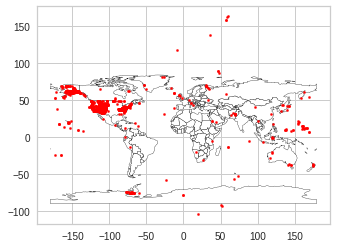

In [ ]:
# geographic distribution of samples
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='RED', markersize=5)

plt.savefig('map.pdf')
plt.savefig('map.svg')
plt.savefig('map.eps')
plt.savefig('map.tiff')
plt.savefig('map.jpg')  
plt.show()

In [ ]:
# mean age of sediments
gdf['AGE'].mean()

85.57998789346247

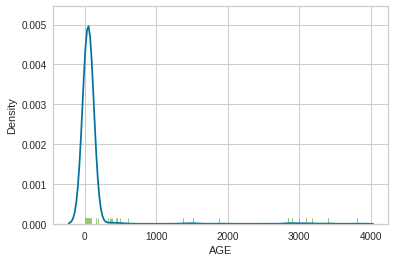

In [ ]:
# age distribution of samples
# sns.histplot(data=gdf, x="AGE")
sns.kdeplot(data=gdf, x="AGE")
sns.rugplot(data=gdf, x="AGE")
plt.savefig('age_dist.pdf')
plt.savefig('age_dist.svg')
plt.savefig('age_dist.eps')
plt.savefig('age_dist.tiff')
plt.savefig('age_dist.jpg')  

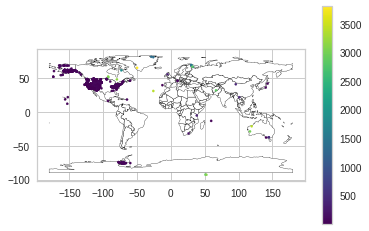

In [ ]:
# age of samples with geographic distribution
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column='AGE', ax=ax, cmap='viridis', markersize=5, legend=True)

plt.savefig('age.pdf')
plt.savefig('age.svg')
plt.savefig('age.eps')
plt.savefig('age.tiff')
plt.savefig('age.jpg')

plt.show()

In [ ]:
# data export
df.to_csv('sample.csv',index=False)

gdf = gdf.drop(columns=['geometry'])
gdf.to_csv('map.csv',index=False)

In [ ]:
df.head()

SAMPLE ID  ROCK NAME   SIO2  TIO2  AL2O3   MNO    MGO    CAO  NA2O   K2O  \
7      17461  GREYWACKE  74.37  0.43  12.97  0.06   1.14   2.27  3.27  2.10   
9    CC20/WR  SANDSTONE  62.45  0.96  16.69  0.10   2.44   1.16  2.48  4.27   
12     13342       SAND  49.39  0.74  16.03  0.16  10.59  10.78  2.40  0.34   
13       GA1       SAND  51.65  0.75  19.46  0.18   5.88  10.62  2.75  0.47   
14       GA6       SAND  48.47  0.72  15.14  0.22  11.64  11.31  2.14  0.37   

    P2O5           class  
7   0.10  coarse clastic  
9   0.19  coarse clastic  
12  0.11  coarse clastic  
13  0.09  coarse clastic  
14  0.07  coarse clastic

## Exploratory Data Analysis (EDA)

In [ ]:
# data stats
df.describe().to_csv('stats.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47fa1adbb0>,
      dtype=object)

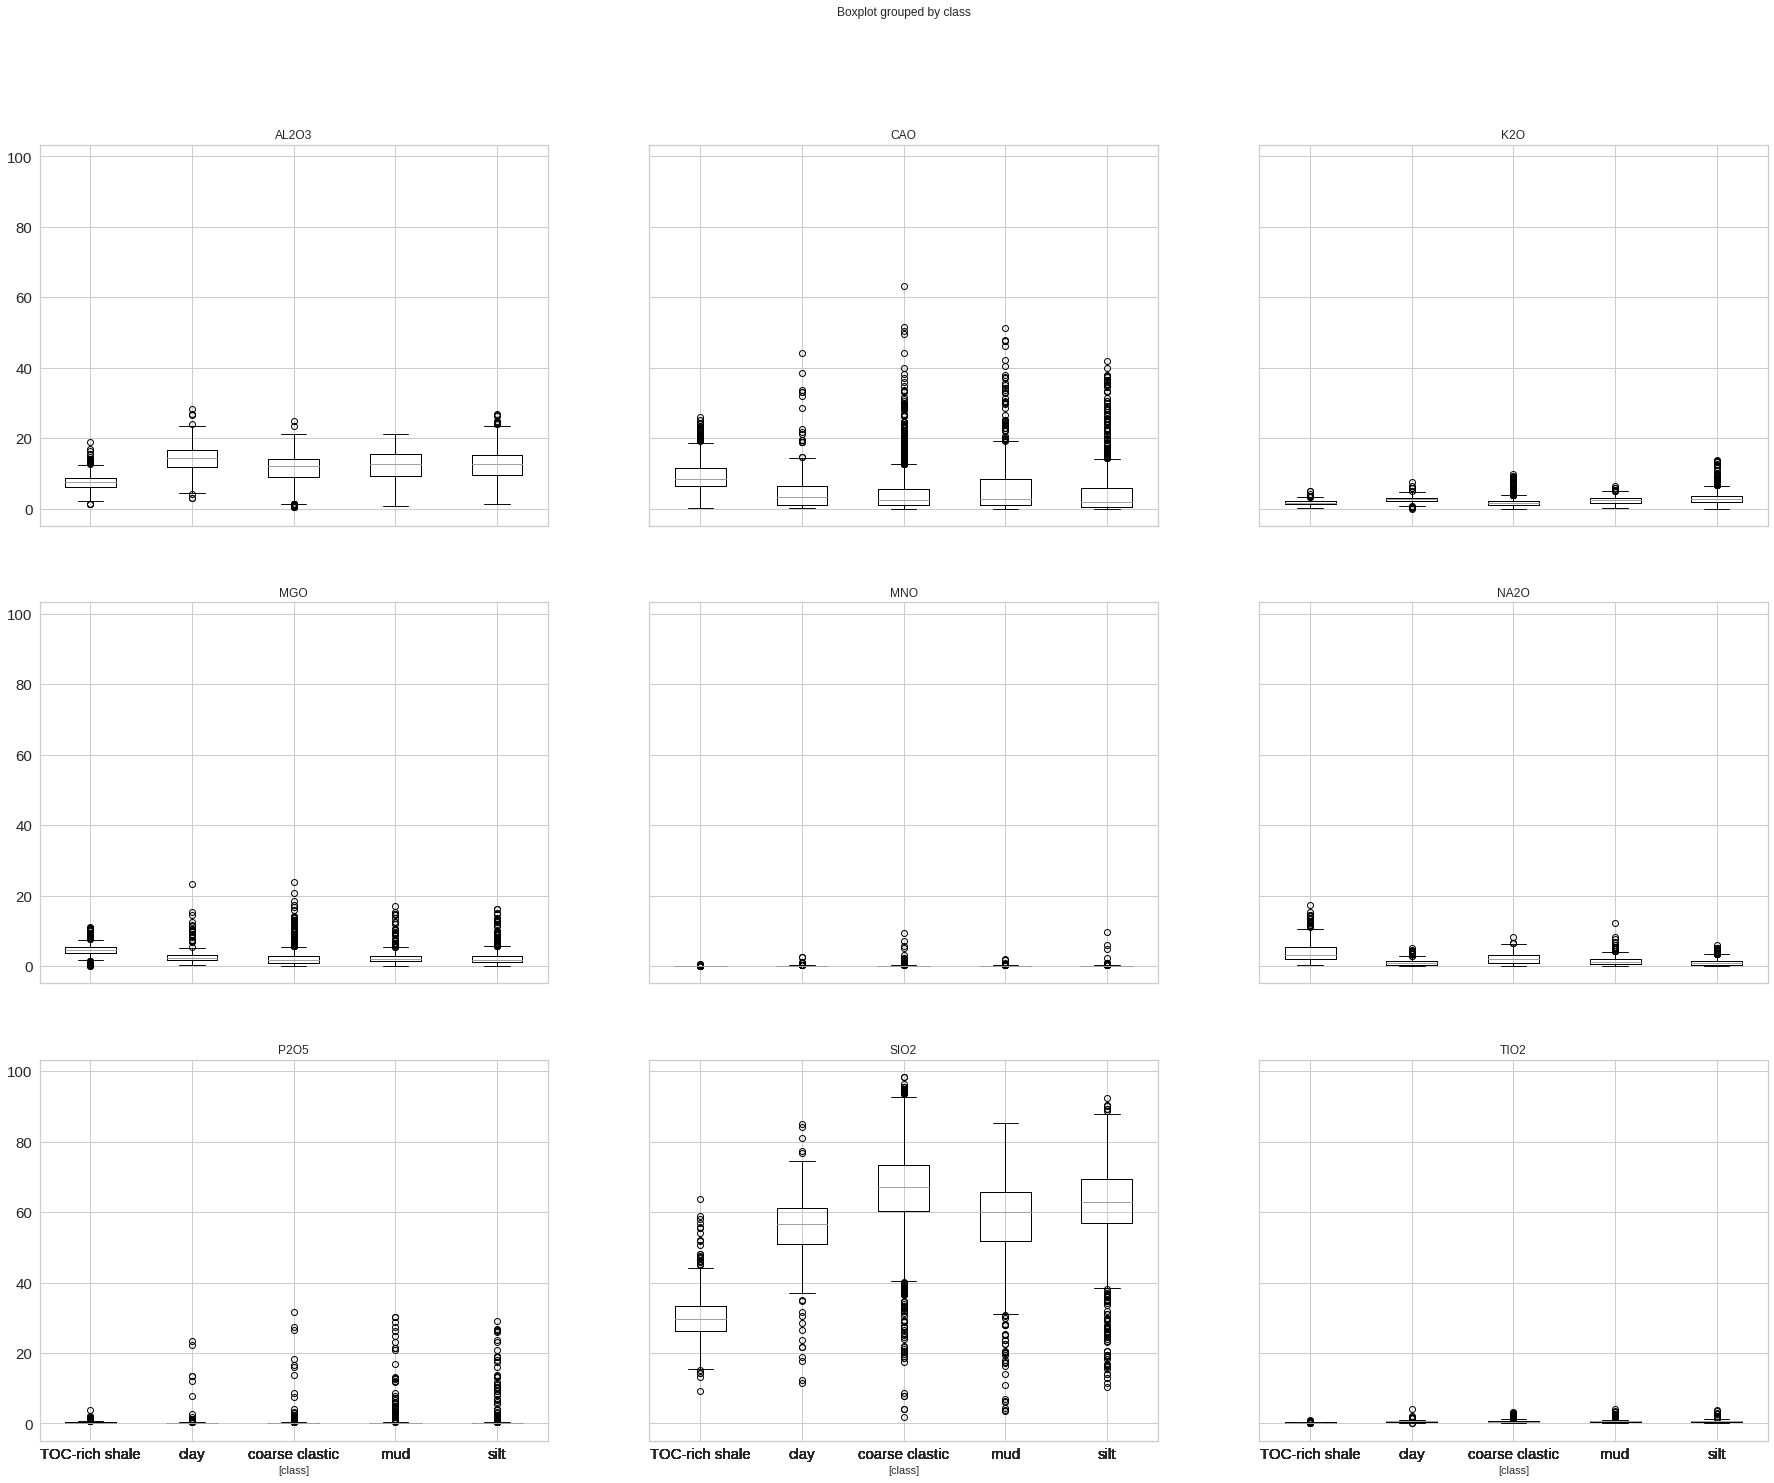

In [ ]:
# boxplot
df.boxplot(by='class', figsize=(30,24), fontsize=15)

In [ ]:
df.columns

Index(['SAMPLE ID', 'ROCK NAME', 'SIO2', 'TIO2', 'AL2O3', 'MNO', 'MGO', 'CAO',
       'NA2O', 'K2O', 'P2O5', 'class'],
      dtype='object')

## Outlier removal

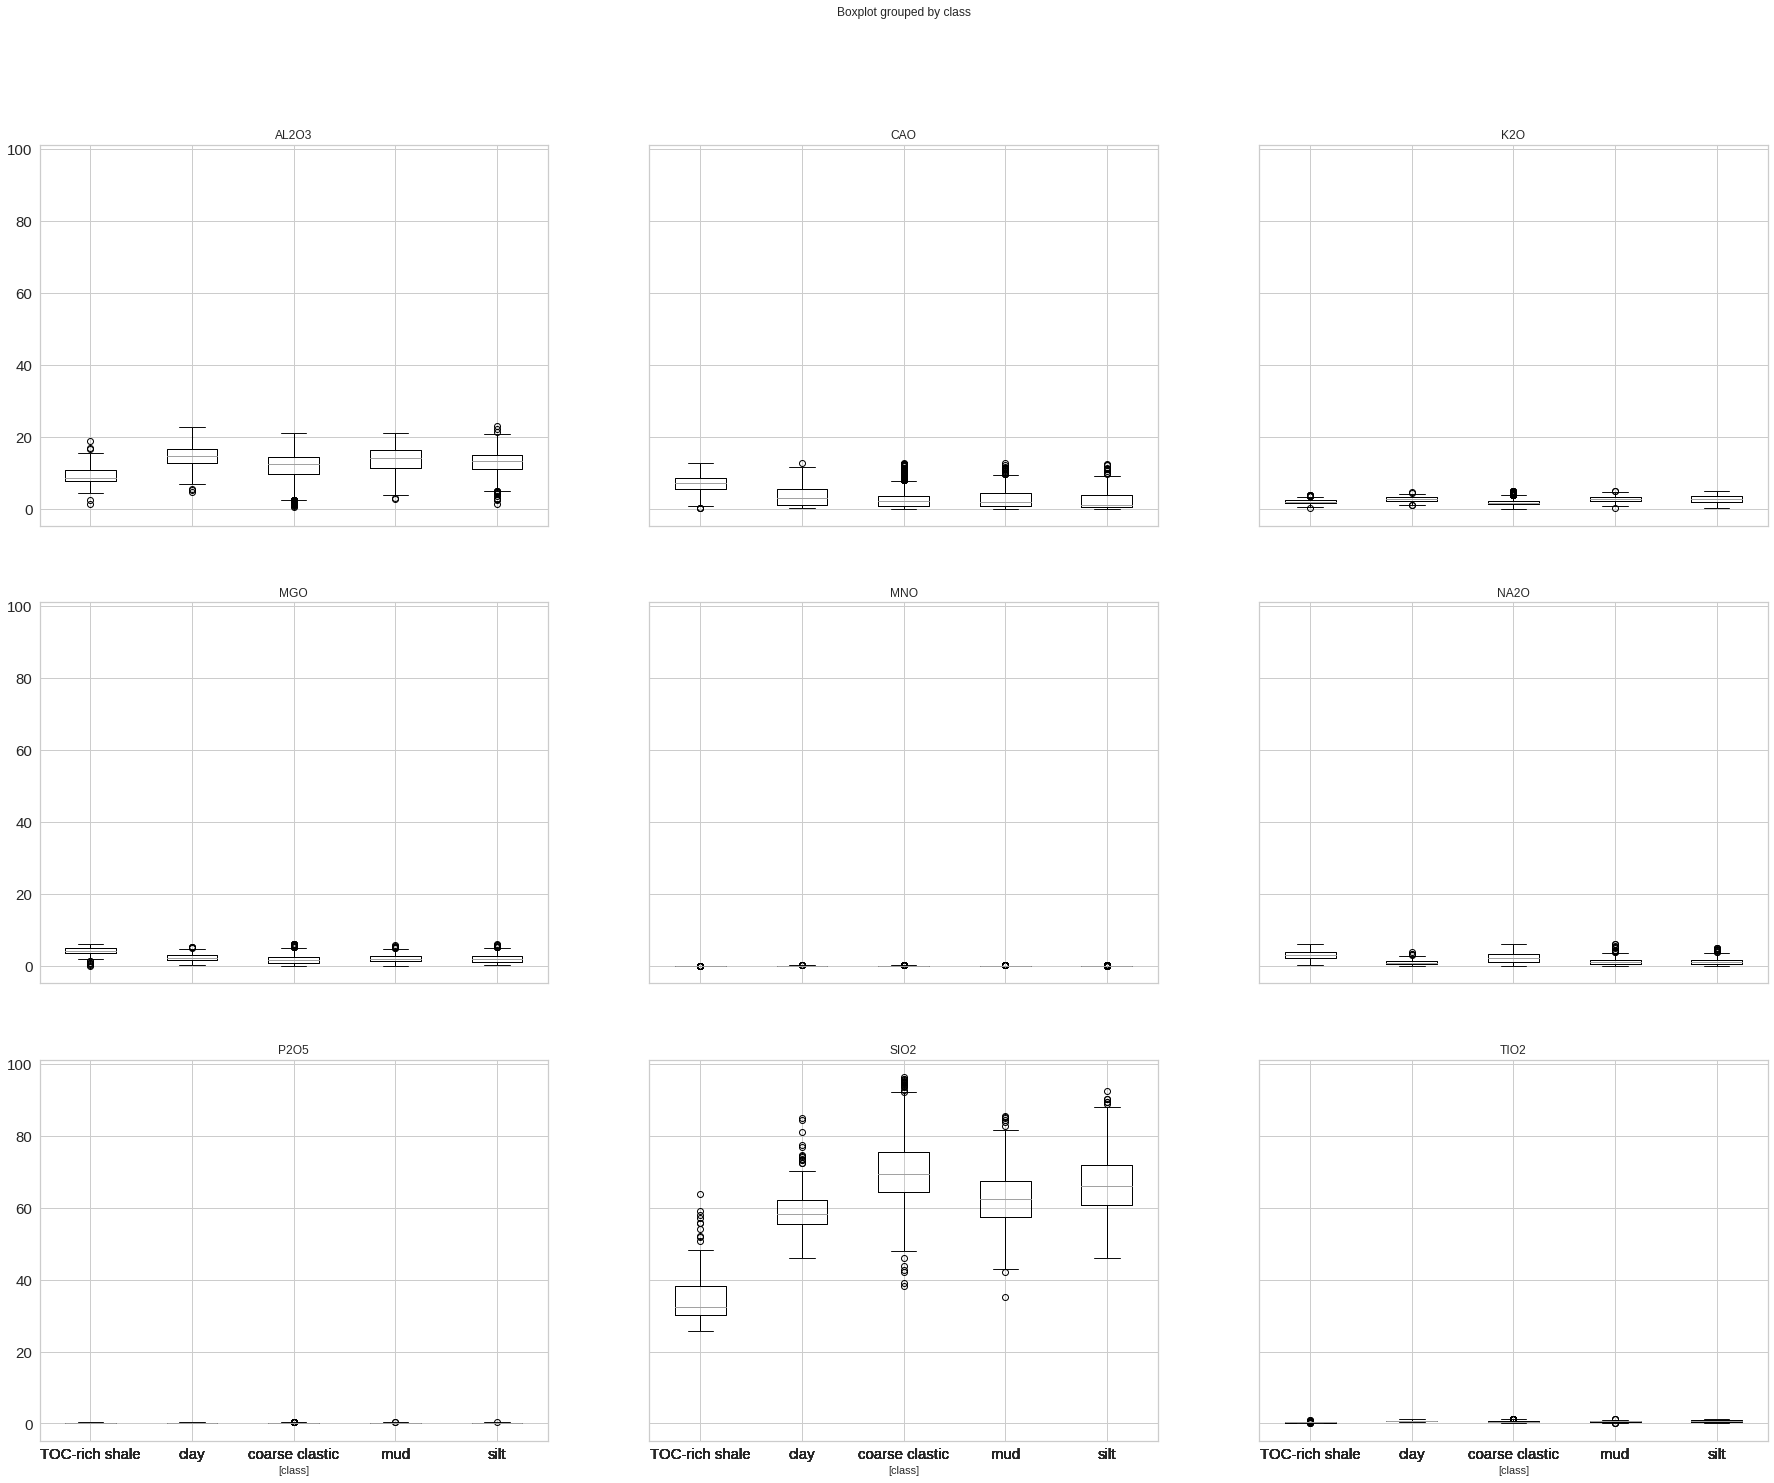

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

df = remove_outliers(df, ['SIO2', 'TIO2', 'AL2O3', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5',])

# outlier removed boxplot
df.boxplot(by='class', figsize=(30,24), fontsize=15)
plt.savefig('box.pdf')
plt.savefig('box.svg')
plt.savefig('box.eps')
plt.savefig('box.tiff')
plt.savefig('box.jpg')

In [ ]:
#check the shape of data
df.shape

(2660, 12)

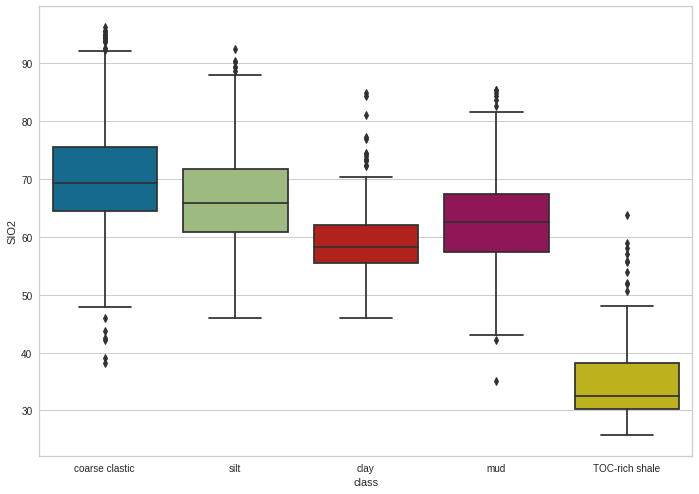

In [ ]:
# boxplot of desired oxide
plt.figure(figsize=(11.7,8.27))
sns.boxplot(y='SIO2', x='class', data=df) 
plt.savefig('box_SIO2.pdf')
plt.savefig('box_SIO2.svg')
plt.savefig('box_SIO2.eps')
plt.savefig('box_SIO2.tiff')
plt.savefig('box_SIO2.jpg')

In [ ]:
df.head()

SAMPLE ID  ROCK NAME   SIO2  TIO2  AL2O3   MNO   MGO    CAO  NA2O   K2O  \
7      17461  GREYWACKE  74.37  0.43  12.97  0.06  1.14   2.27  3.27  2.10   
9    CC20/WR  SANDSTONE  62.45  0.96  16.69  0.10  2.44   1.16  2.48  4.27   
13       GA1       SAND  51.65  0.75  19.46  0.18  5.88  10.62  2.75  0.47   
35   P.26184  GREYWACKE  64.70  0.78  15.50  0.11  1.97   2.35  3.95  2.05   
41     OKU34  SANDSTONE  64.71  0.58   9.97  0.11  2.47   5.64  4.97  2.48   

    P2O5           class  
7   0.10  coarse clastic  
9   0.19  coarse clastic  
13  0.09  coarse clastic  
35  0.17  coarse clastic  
41  0.18  coarse clastic

In [ ]:
# correlation matrix export
df.corr().to_csv('corr.csv')

## Collinearity of variables check

As a general rule of thumb is to remove collinear input variables with | ± 90%| as those variables provide the same information; hence are redundant and would increase the dimensionality of the input data set. Unless those collinear parameters happen to be collinear due to other factors such as timing, it is best to remove those parameters.

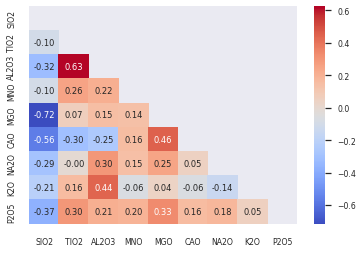

In [ ]:
# heatmap export
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=0.7)
heat = sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask = mask, fmt='.2f')

plt.savefig('heat.pdf')
plt.savefig('heat.svg')
plt.savefig('heat.eps')
plt.savefig('heat.tiff')
plt.savefig('heat.jpg')

as evident by the correlation matrix and heatmap, no pair of collinear input variables found in the current study.

In [ ]:
df = df.drop(columns=['SAMPLE ID'])

In [ ]:
df.columns

Index(['ROCK NAME', 'SIO2', 'TIO2', 'AL2O3', 'MNO', 'MGO', 'CAO', 'NA2O',
       'K2O', 'P2O5', 'class'],
      dtype='object')

In [ ]:
df_heat = df.drop(columns=['ROCK NAME', 'class'])

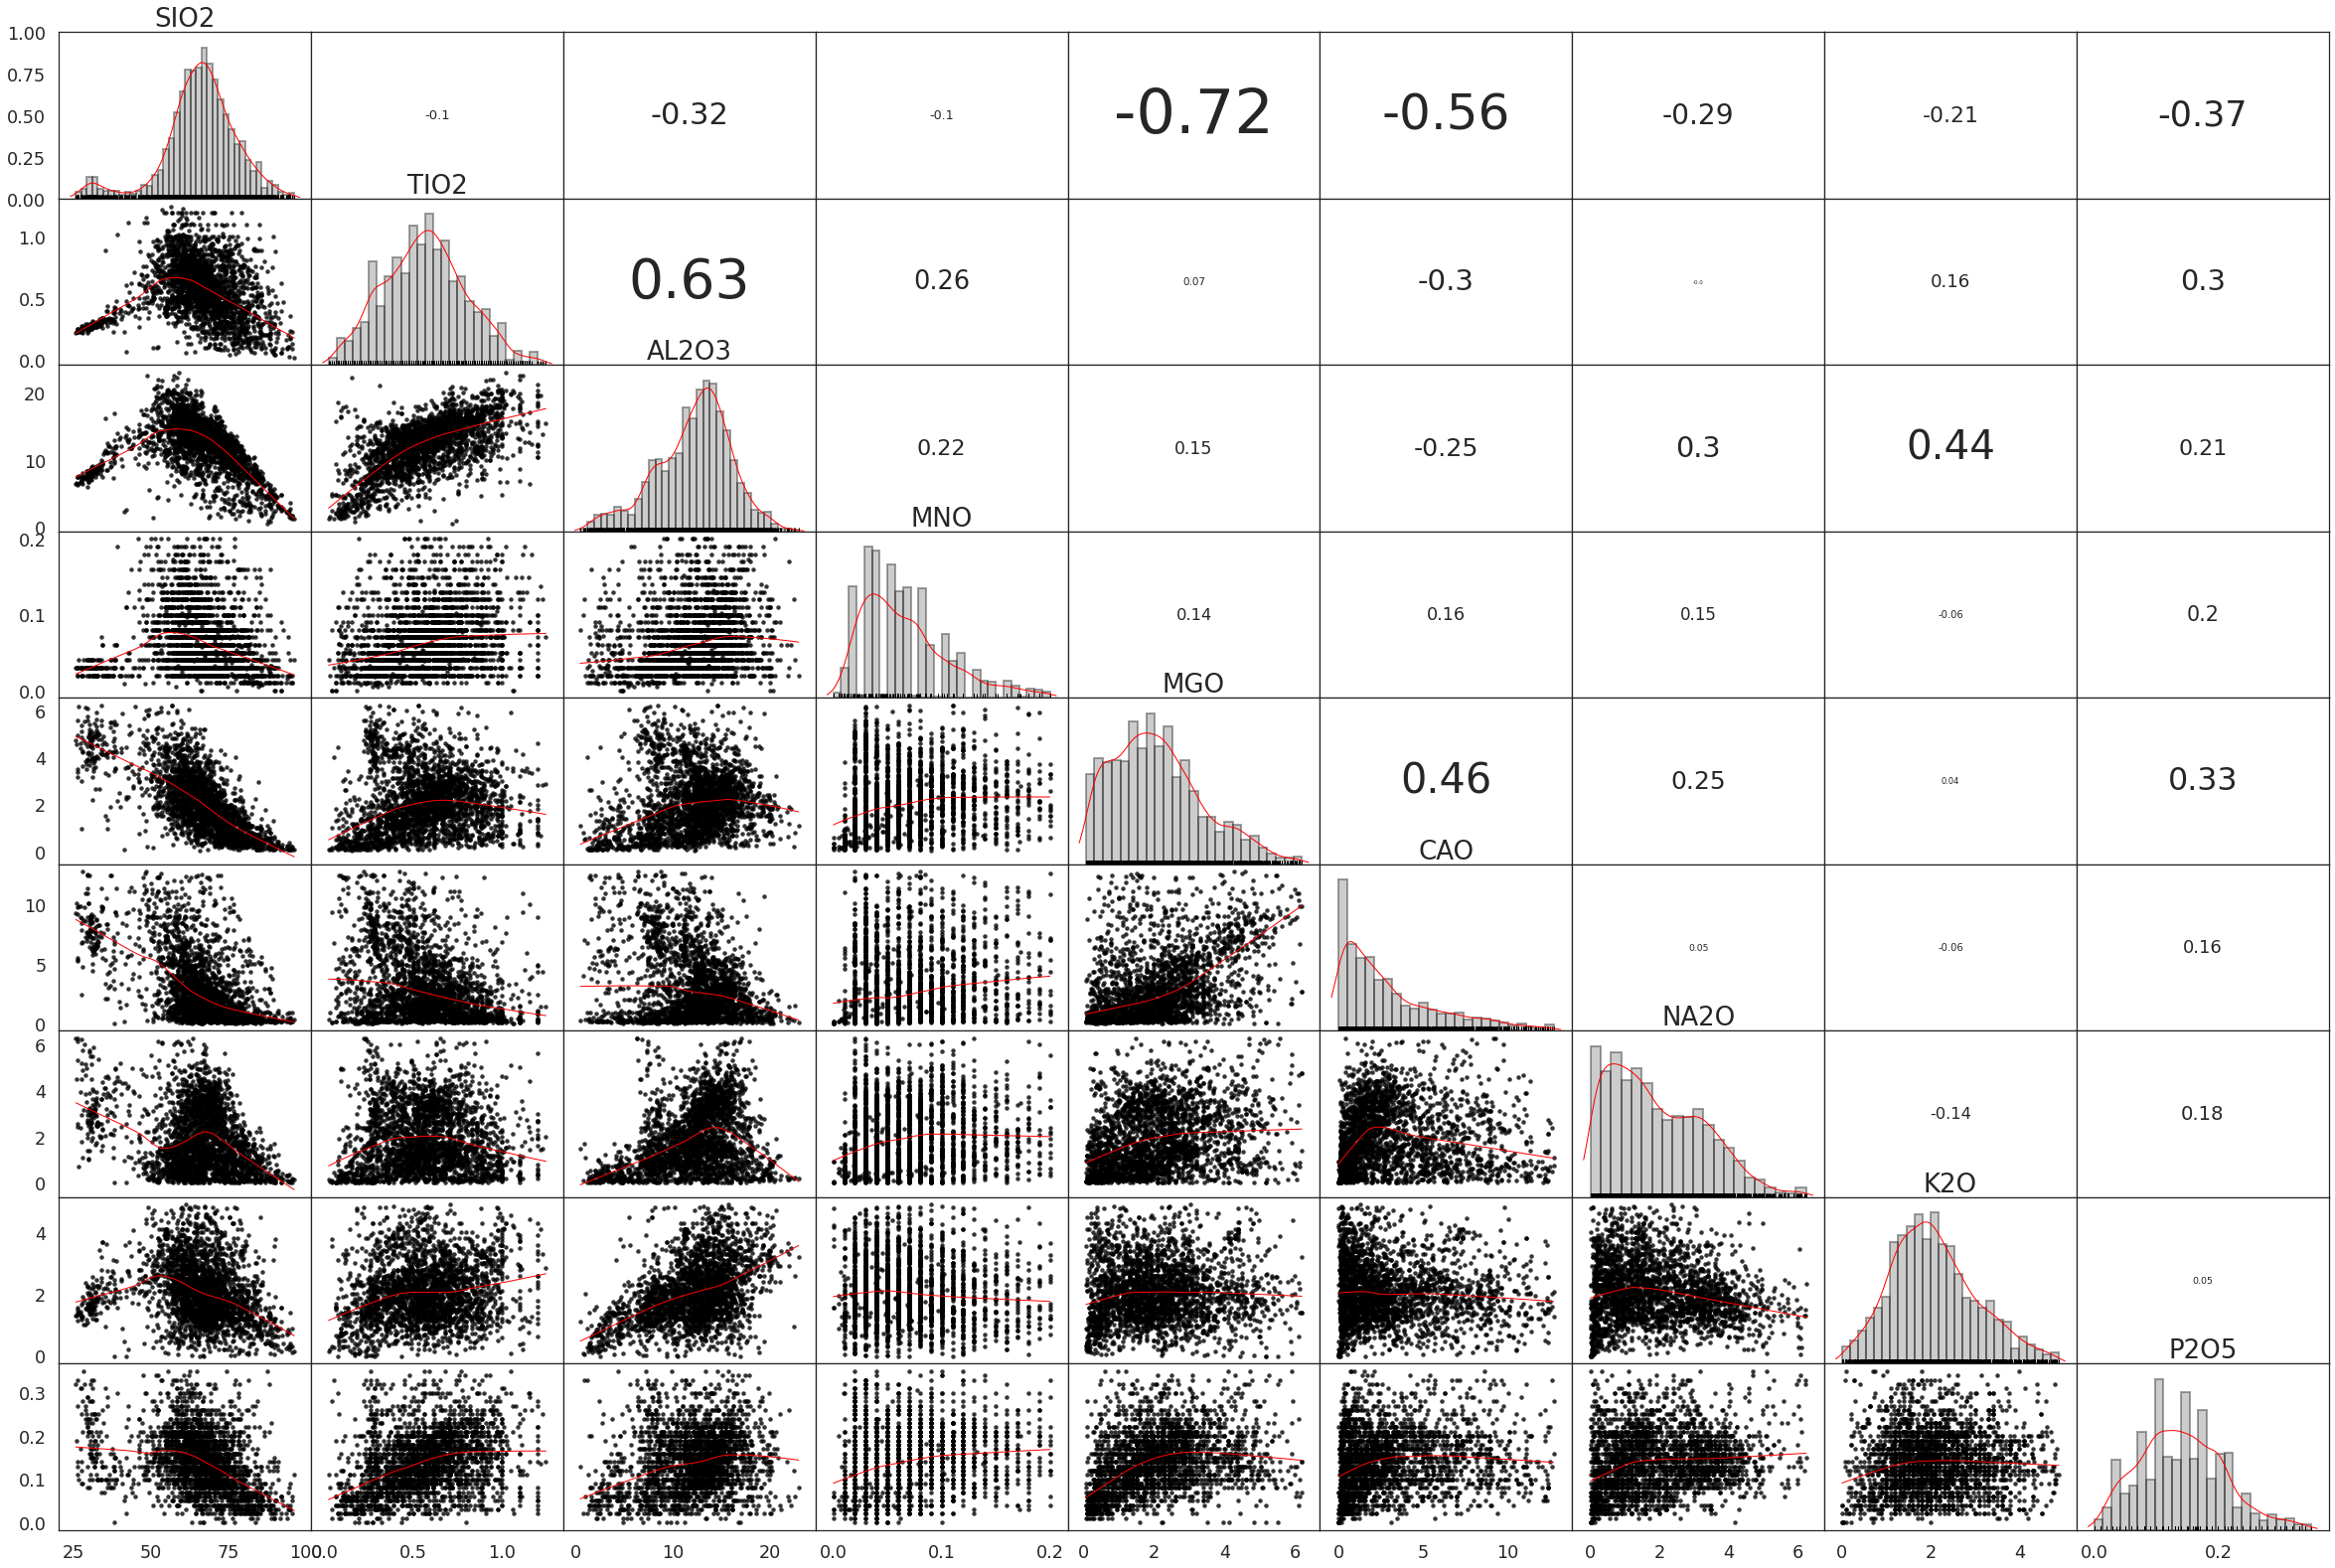

In [ ]:
# scatter plot of matrices, with bivariate scatter plots below the diagonal, histograms on the diagonal, and the Pearson correlation (ordered) above the diagonal
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# def corrfunc(x, y, **kws):
#     r, p = stats.pearsonr(x, y)
#     p_stars = ''
#     if p <= 0.05:
#         p_stars = '*'
#     if p <= 0.01:
#         p_stars = '**'
#     if p <= 0.001:
#         p_stars = '***'
#     ax = plt.gca()
#     ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
#                 color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)
# iris = sns.load_dataset('iris')
heat = sns.PairGrid(df_heat, aspect=1.5, diag_sharey=False, despine=False)
heat.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
heat.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
heat.map_diag(sns.rugplot, color='black')
heat.map_upper(corrdot)
# g.map_upper(corrfunc)
heat.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in heat.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(heat.axes), df_heat.columns):
    ax.set_title(col, y=0.82, fontsize=26)

plt.savefig('heat_customized.pdf')
plt.savefig('heat_customized.svg')
plt.savefig('heat_customized.eps')
plt.savefig('heat_customized.tiff')
plt.savefig('heat_customized.jpg')     

In [ ]:
df.head()

ROCK NAME   SIO2  TIO2  AL2O3   MNO   MGO    CAO  NA2O   K2O  P2O5  \
7   GREYWACKE  74.37  0.43  12.97  0.06  1.14   2.27  3.27  2.10  0.10   
9   SANDSTONE  62.45  0.96  16.69  0.10  2.44   1.16  2.48  4.27  0.19   
13       SAND  51.65  0.75  19.46  0.18  5.88  10.62  2.75  0.47  0.09   
35  GREYWACKE  64.70  0.78  15.50  0.11  1.97   2.35  3.95  2.05  0.17   
41  SANDSTONE  64.71  0.58   9.97  0.11  2.47   5.64  4.97  2.48  0.18   

             class  
7   coarse clastic  
9   coarse clastic  
13  coarse clastic  
35  coarse clastic  
41  coarse clastic

# Multiclass Classification

## Scaling

In [ ]:
# standardization
df_trans=(df-df.mean())/df.std()

# normalization
# df_trans=df.drop(columns=['ROCK NAME', 'class'])
# df_trans=(df_trans-df_trans.min())/(df_trans.max()-df_trans.min())

df_trans['ROCK NAME'], df_trans['class'] = df['ROCK NAME'], df['class']

## Data split

In order to demonstrate the predict_model() function on unseen data, a sample of few records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df_trans.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2394, 11)
Unseen Data For Predictions: (266, 11)


## Setting up the Environment

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment.

In [ ]:
# Setup design
exp_mclf101 = setup(data = data, target = 'class', session_id=123) 

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                 123  
1                                               class  
2                                          Multiclass  
3   TOC-rich shale: 0, clay: 1, coarse clastic: 2,...  
4                                          (2394, 11)  
5                                               False  
6                                                   9  
7                                                   1  
8                                               False  
9                                               False  
10                                               None  
11                                         (1675, 22)  
12                                          (719, 22)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                              False  
20                                   clf-default

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been successfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. 

A few important things to note at this stage include:

session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

Label Encoded : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

Original Data : Displays the original shape of the dataset.

Missing Values : When there are missing values in the original data this will show as True.

Numeric Features : The number of features inferred as numeric.

Categorical Features : The number of features inferred as categorical. 

Transformed Train Set : Displays the shape of the transformed training set.

Transformed Test Set : Displays the shape of the transformed test/hold-out set. 

## Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [ ]:
# model comparison
best = compare_models()
pull().to_csv('best.csv')

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    0.9988  0.9986  0.9969  0.9988   
ridge                    Ridge Classifier    0.9988  0.0000  0.9969  0.9988   
gbc          Gradient Boosting Classifier    0.9988  1.0000  0.9969  0.9988   
et                 Extra Trees Classifier    0.9988  1.0000  0.9969  0.9988   
lr                    Logistic Regression    0.9970  1.0000  0.9916  0.9971   
svm                   SVM - Linear Kernel    0.9946  0.0000  0.9845  0.9948   
rf               Random Forest Classifier    0.9934  1.0000  0.9816  0.9936   
lightgbm  Light Gradient Boosting Machine    0.9922  0.9999  0.9810  0.9926   
knn                K Neighbors Classifier    0.9463  0.9876  0.9144  0.9475   
ada                  Ada Boost Classifier    0.8585  0.8554  0.6000  0.7450   
lda          Linear Discriminant Analysis    0.7756  0.9081  0.7333  0.7655   
dummy                    Dummy Classifier    0.5743  0.5000  0.2000  0.3299   
qda       Quadratic Discriminant Analysis    0.0669  0.0000  0.2000  0.0045   

              F1   Kappa     MCC  TT (Sec)  
nb        1.0000  1.0000  1.0000     0.016  
dt        0.9988  0.9980  0.9981     0.018  
ridge     0.9988  0.9980  0.9981     0.012  
gbc       0.9988  0.9980  0.9981     1.487  
et        0.9988  0.9980  0.9981     0.193  
lr        0.9969  0.9951  0.9952     0.408  
svm       0.9945  0.9912  0.9913     0.020  
rf        0.9933  0.9892  0.9894     0.262  
lightgbm  0.9922  0.9874  0.9875     0.440  
knn       0.9453  0.9114  0.9125     0.041  
ada       0.7955  0.7414  0.7726     0.150  
lda       0.7659  0.6227  0.6271     0.020  
dummy     0.4190  0.0000  0.0000     0.015  
qda       0.0084  0.0000  0.0000     0.023

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


This has evaluated over different models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the sort parameter. For example compare_models(sort = 'Recall') will sort the grid by Recall instead of Accuracy. If you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For example compare_models(fold = 5) will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using n_select parameter.

Note: The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

## Create a Model

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

### Naive Bayes

In [ ]:
nb = create_model('nb')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
Std        0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'nb'. 
print(nb)

GaussianNB(priors=None, var_smoothing=1e-09)


### Decision Tree Classifier

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9880  0.9859  0.9692  0.9883  0.9876  0.9804  0.9807
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9988  0.9986  0.9969  0.9988  0.9988  0.9980  0.9981
Std     0.0036  0.0042  0.0092  0.0035  0.0037  0.0059  0.0058

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


### Ridge Classifier

In [ ]:
ridge = create_model('ridge')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9880  0.0  0.9692  0.9883  0.9876  0.9804  0.9807
8       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9988  0.0  0.9969  0.9988  0.9988  0.9980  0.9981
Std     0.0036  0.0  0.0092  0.0035  0.0037  0.0059  0.0058

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:create_model() succesfully completed......................................


### Gradient Boosting Classifier

In [ ]:
gbc = create_model('gbc')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9880  1.0  0.9692  0.9883  0.9876  0.9804  0.9807
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9988  1.0  0.9969  0.9988  0.9988  0.9980  0.9981
Std     0.0036  0.0  0.0092  0.0035  0.0037  0.0059  0.0058

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


### Extra Trees Classifier

In [ ]:
et = create_model('et')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9880  1.0  0.9692  0.9883  0.9876  0.9804  0.9807
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9988  1.0  0.9969  0.9988  0.9988  0.9980  0.9981
Std     0.0036  0.0  0.0092  0.0035  0.0037  0.0059  0.0058

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


Notice that the Mean score of all models matches with the score printed in compare_models(). This is because the metrics printed in the compare_models() score grid are the average scores across all CV folds.

## Tune a Model

When a model is created using the create_model() function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model() function is used. This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass custom_grid parameter in the tune_model function.

### Naive Bayes

In [ ]:
tuned_nb = tune_model(nb)
pull().to_csv('nb.csv')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
Std        0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_nb'. 
print(tuned_nb)

GaussianNB(priors=None, var_smoothing=2e-09)


### Ridge Classifier

In [ ]:
tuned_ridge = tune_model(ridge)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  0.0     1.0    1.0  1.0    1.0  1.0
1          1.0  0.0     1.0    1.0  1.0    1.0  1.0
2          1.0  0.0     1.0    1.0  1.0    1.0  1.0
3          1.0  0.0     1.0    1.0  1.0    1.0  1.0
4          1.0  0.0     1.0    1.0  1.0    1.0  1.0
5          1.0  0.0     1.0    1.0  1.0    1.0  1.0
6          1.0  0.0     1.0    1.0  1.0    1.0  1.0
7          1.0  0.0     1.0    1.0  1.0    1.0  1.0
8          1.0  0.0     1.0    1.0  1.0    1.0  1.0
9          1.0  0.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  0.0     1.0    1.0  1.0    1.0  1.0
Std        0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RidgeClassifier(alpha=8.96, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


### Gradient Boosting Classifier

In [ ]:
tuned_gbc = tune_model(gbc)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9820  0.9998  0.9510  0.9826  0.9815  0.9705  0.9710
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9940  1.0000  0.9979  0.9945  0.9941  0.9904  0.9904
Mean    0.9976  1.0000  0.9949  0.9977  0.9976  0.9961  0.9961
Std     0.0055  0.0000  0.0146  0.0053  0.0056  0.0090  0.0088

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### Extra Trees Classifier

In [ ]:
tuned_et = tune_model(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  0.9999  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9940  1.0000  0.9818  0.9941  0.9939  0.9903  0.9903
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9880  1.0000  0.9664  0.9883  0.9878  0.9804  0.9807
8       0.9940  1.0000  0.9818  0.9944  0.9940  0.9903  0.9904
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9976  1.0000  0.9930  0.9977  0.9976  0.9961  0.9961
Std     0.0040  0.0000  0.0114  0.0039  0.0040  0.0065  0.0064

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using the optimize parameter. For example: tune_model(dt, optimize = 'Recall') will search for the hyperparameters of a Decision Tree Classifier that result in the highest Recall. For the purposes of this case, we have used the default metric Accuracy for the sake of simplicity only.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc.

## Plot a Model

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

### Confusion Matrix

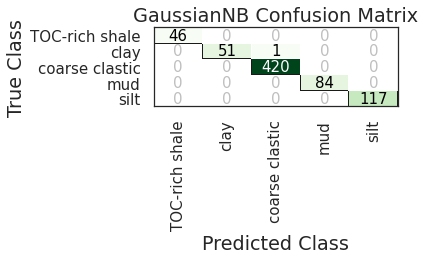

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_nb, plot = 'confusion_matrix', save=True, scale=5)

plot_model(tuned_nb, plot = 'confusion_matrix')

# # Save the confusion matrix plot as a TIFF file
# save_model(plot_model, "confusion_matrix.tiff")

### Classification Report

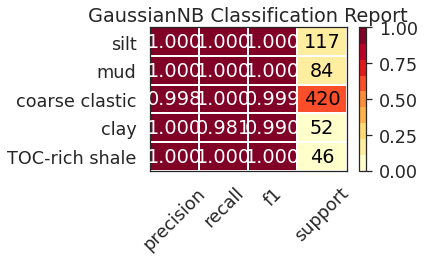

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_nb, plot = 'class_report', save=True, scale=5)
plot_model(tuned_nb, plot = 'class_report')

### Decision Boundary Plot

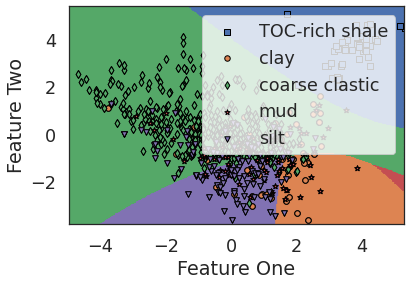

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_nb, plot='boundary', save=True, scale=5)
plot_model(tuned_nb, plot='boundary',)

### Prediction Error Plot

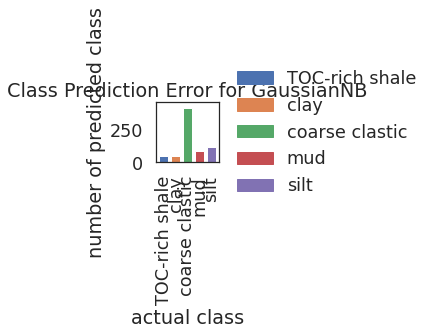

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_nb, plot = 'error', save=True, scale=5)
plot_model(tuned_nb, plot = 'error')

Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_nb)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If one look at the information above, will see that 30% of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned_knn variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [ ]:
predict_model(tuned_nb);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0  Naive Bayes    0.9986  0.9983  0.9962  0.9986  0.9986  0.9977  0.9977

In this case, we will move forward with finalizing the model and predicting on unseen data (the 10% that we had separated in the beginning and never exposed to PyCaret).

## Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [ ]:
final_nb = finalize_model(tuned_nb)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Naive Bayes Imported succesfully
INFO:logs:Starting cross validation
IN

In [ ]:
#Final Naive Bayes parameters for deployment
print(final_nb)

GaussianNB(priors=None, var_smoothing=2e-09)


## Predict on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning and contains 10% of the original dataset which was never exposed to PyCaret.

In [ ]:
unseen_predictions = predict_model(final_nb, data=data_unseen)
unseen_predictions.to_csv('prediction.csv')
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy  AUC  Recall  Prec.  F1  Kappa  MCC
0  Naive Bayes       0.0  1.0       0      0   0      0    0

ROCK NAME  SIO2  TIO2  AL2O3  MNO  MGO  CAO  NA2O  K2O  P2O5  \
0  SANDSTONE  65.2   0.6   15.4  0.1  2.9  3.6   3.9  1.7   0.2   
1  SANDSTONE  66.7   0.5   15.2  0.1  2.6  3.7   3.4  2.3   0.1   
2  SANDSTONE  64.4   0.6   16.9  0.1  2.8  1.8   2.9  2.6   0.2   
3  SANDSTONE  65.1   0.5   16.6  0.1  2.5  4.2   4.9  1.7   0.2   
4  SANDSTONE  68.9   0.5   16.1  0.1  1.3  3.1   4.1  2.7   0.2   

            class           Label  Score  
0  coarse clastic  coarse clastic    1.0  
1  coarse clastic  coarse clastic    1.0  
2  coarse clastic  coarse clastic    1.0  
3  coarse clastic  coarse clastic    1.0  
4  coarse clastic  coarse clastic    1.0

The Label and Score columns are added onto the data_unseen set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

## Saving the model

We have now finished the experiment by finalizing the tuned_nb model which is now stored in the final_nb variable. We have also used the model stored in final_nb to predict data_unseen. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [ ]:
save_model_nb = save_model(final_nb,'Final nb Model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GaussianNB(priors=None, var_smoothing=2e-09), model_name=Final nb Model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passt

Transformation Pipeline and Model Successfully Saved


Transformation Pipeline and Model Succesfully Saved
(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

## Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [ ]:
saved_final_nb = load_model('Final nb Model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final nb Model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Transformation Pipeline and Model Sucessfully Loaded
Once the model is loaded in the environment, one can simply use it to predict on any new data using the same predict_model() function. Below we have applied the loaded model to predict the same data_unseen that we used in section above.

In [ ]:
new_prediction = predict_model(saved_final_nb, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_1

Model  Accuracy  AUC  Recall  Prec.  F1  Kappa  MCC
0  Naive Bayes       0.0  1.0       0      0   0      0    0

In [ ]:
new_prediction.head()

ROCK NAME  SIO2  TIO2  AL2O3  MNO  MGO  CAO  NA2O  K2O  P2O5  \
0  SANDSTONE  65.2   0.6   15.4  0.1  2.9  3.6   3.9  1.7   0.2   
1  SANDSTONE  66.7   0.5   15.2  0.1  2.6  3.7   3.4  2.3   0.1   
2  SANDSTONE  64.4   0.6   16.9  0.1  2.8  1.8   2.9  2.6   0.2   
3  SANDSTONE  65.1   0.5   16.6  0.1  2.5  4.2   4.9  1.7   0.2   
4  SANDSTONE  68.9   0.5   16.1  0.1  1.3  3.1   4.1  2.7   0.2   

            class           Label  Score  
0  coarse clastic  coarse clastic    1.0  
1  coarse clastic  coarse clastic    1.0  
2  coarse clastic  coarse clastic    1.0  
3  coarse clastic  coarse clastic    1.0  
4  coarse clastic  coarse clastic    1.0

Notice that the results of unseen_predictions and new_prediction are identical.